# Deutsch-Jozsa Algorithm

Deutsch's problem, which was later generalized to the Deutsch-Josza algorithm, was the first quantum algorithm with an exponential speed-up compared to any classical algorithm. Though the problem itself hasn't found any usefulness, it also showed that a qauntum computer can answer a question way faster than a normal computer and with 100% probablity of getting the right answer (excluding noise). It later inspired Simon's algorithm which inspired Shor's algorithm.

#### Prerequisites:
* [Theory Basics: the Qubit](https://appliedqc.org/2020/01/20/Theory-Basics-The-Qubit.html)
* Dirac notation

In [1]:
# This may take a few seconds
import numpy as np
import pandas as pd
from qiskit import *
import matplotlib.pyplot as plt

## Deutsch Problem (and algorithm)
We'll first start with Deutsch's original algorithm. The problem it answered goes like this. Given an unknown (aka black box) binary function $f(x)$ that maps one bit to another bit, $f(x):\{0,1\} \rightarrow\{0,1\}$, determine if $f(x)$ is constant or balanced. A constant function means $f(0)=f(1)$ while a balanced function means $f(0)\neq f(1)$ (since we're only considering binary input and output). For one input qubit and one output qubit, there are only four possible binary functions. Let's name them $f_0,f_1,f_2, \text{and} f_3$ and tabulate their possible outputs.

$$
\begin{array}{c|c|c}
  & x=0 & x=1 \\\hline
  f_0(x)= & 0 & 0 \\\hline
  f_1(x)= & 0 & 1 \\\hline
  f_2(x)= & 1 & 0 \\\hline
  f_3(x)= & 1 & 1 \\
\end{array}
$$

From this table, we see $f_0$ and $f_3$ are constant functions while $f_1$ and $f_2$ are balanced functions. Now, let's say a friend randomly picks one of these functions but hides which one by calling it $f(x)$. Our friend implements the randomly chosen $f(x)$ as a unitary (probability conserving) operation $U_f$ that spans the input (q_0) and output (q_1) qubits like so...

In [2]:
circuit = QuantumCircuit(2,1)
circuit.append(qiskit.circuit.Gate(name='U_f', num_qubits=2, params=[]), [0,1])
circuit.draw()

The classical approach would be to try every possible input and measure the output. Once we tried both 0 and 1 as inputs, we'd know if $f(x)$ is balanced or not.

The quantum approach (1) makes a superposition of all possible inputs and (2) interferes the possibilities such that a 0 measured on q_0 (the input qubit) means $f(x)$ is constant and 1 measured on q_0 means $f(x)$ is balanced.

Let's do it!

To makes a superposition of all possible inputs, we apply a Hadamard (H) to the input qubit q_0. To get the right interference q_1 needs to be a 1 and also in a superposition, so it will get gates X then H. We apply the mystery function as a unitary operation on the qubits $U_f$. To complete the interference, every qubit gets and H after $U_f$. Then we measure. Our circuit will look something like this.

In [3]:
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.append(qiskit.circuit.Gate(name='U_f', num_qubits=2, params=[]), [0,1])
circuit.barrier()
circuit.h([0,1])
circuit.measure([0],[0])
# Visualize the constructed circuit
circuit.draw()

For sake of experimenting, let's pick some $U_f$s and see if the algorithm works! The simplest $U_f$ is nothing. This would correspond to a constant function; no matter what state we make q_0 (the input), q_1 (the output) will always be 1. Remember, for a constant function q_0 should always be in the 0 state.

In [4]:
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])
# Visualize the constructed circuit
circuit.draw()

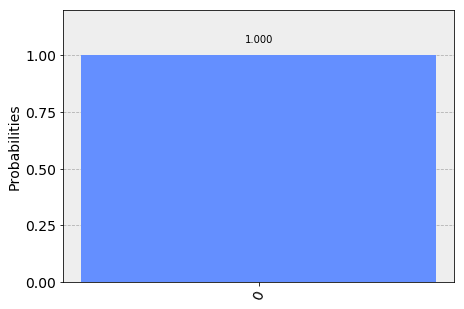

In [5]:
# Execute quantum circuit and view results
backend_sim = BasicAer.get_backend('qasm_simulator')
simulator_shots = 10000

result = execute(circuit, backend_sim, shots=simulator_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

Ta-da! The histogram shows 0 with 100% probability! Let's run through the other three unique $U_f$s

In [6]:
# Constant U_f. Should get a 0 on q_0

circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.x(1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])
# Visualize the constructed circuit
circuit.draw()

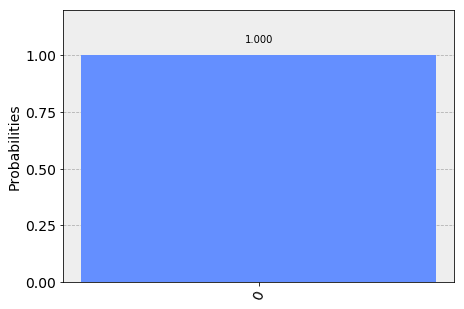

In [7]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=simulator_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

In [8]:
# Balanced U_f. Should get a 1 on q_0

circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])
# Visualize the constructed circuit
circuit.draw()

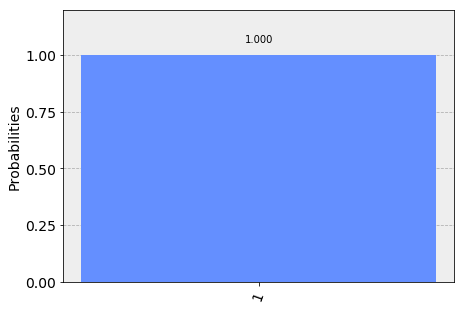

In [9]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=simulator_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

In [10]:
# Balanced U_f. Should get a 1 on q_0

circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.x(1)
circuit.cx(0,1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])
# Visualize circuit
circuit.draw()

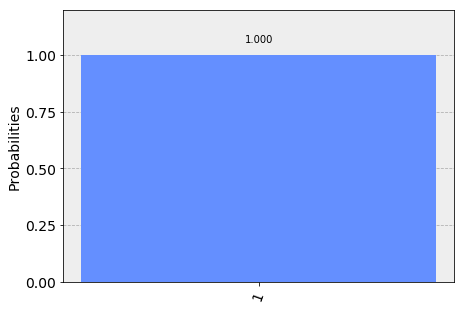

In [11]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=simulator_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

Of course, we should also runs these on a <strong>Real Quantum Computer</strong>. I'll pick the third $U_f$ which is a balanced function. You will need to have an [IBM Q Experience account](https://quantum-computing.ibm.com) to do this.

In [12]:
# Filter backends to find the least busy 5 qubit quantum computer and check current "pending_jobs"
from qiskit.providers.ibmq import least_busy

IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q')
smaller_qcs = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)
backend_real = least_busy(smaller_qcs)
max_real_shots = 8192

# Check status and "pending_jobs" to see how long it might take to run
backend_real.status()

BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=1, status_msg='active')

In [13]:
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])
# Visualize circuit
circuit.draw()

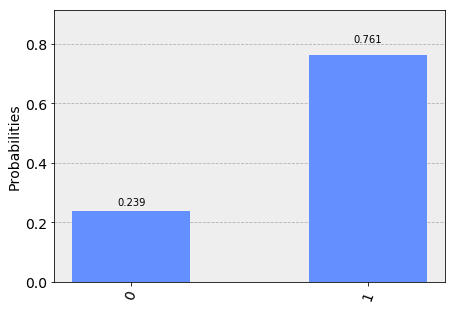

In [14]:
# Execute quantum circuit and view results on a real quantum computer. max shots = 8192.
result = execute(circuit, backend_real, shots=max_real_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

Deutsch's algorithm <strong>guarantees</strong> q_0 will be 1 at the output for a balanced $U_f$, but that's not what we just measured! There's ~24% of a 0 state. What happened?? Well, the quantum computer isn't perfectly quantum all the time: electrical noise in executing the gates, the temperature of the superconducting chips, vibrations, etc. etc. all work toward making these qubits no longer "quantum".

## Deutsch-Jozsa Problem (and algorithm)
The extension from Deutsch to Deutsch-Jozsa is straight forward. We simply increase the number of input qubits from 1 to $n$. The reset of the process is the same. Measuring the $n$ input qubits at the very end will give all 0's only for a constant function and <strong>any other</strong> state for a balanced function. Try and make you're own balanced or constant $U_f$ and see how it goes. Here's mine attempt using a balanced function of just one control not gate. Remember, for a balanced function, the measured state of the input qubits should give a state OTHER than 0000.

In [15]:
circuit = QuantumCircuit(5,4)
circuit.x(4)
circuit.h([0,1,2,3,4])
circuit.barrier()
circuit.cx(3,4)
circuit.barrier()
circuit.h([0,1,2,3,4])
circuit.measure([0,1,2,3], [0,1,2,3])
# Visualize circuit
circuit.draw()

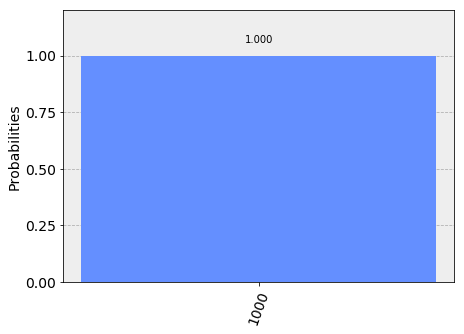

In [16]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=simulator_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

In [ ]:
result = execute(circuit, backend_real, shots=max_real_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)